Computer vision is a practice of writing algorithms which can discover patterns in visual data such as the camera of a self-driving car recognizeing a car in front.

In [ ]:
#Get the data 
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloading file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-09 13:11:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  18.8MB/s    in 7.5s    

2023-03-09 13:11:33 (14.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#See the data 
!ls pizza_steak


ls: cannot access 'pizza_steak': No such file or directory


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

#Walk through the pizza_steak directory and list the number of files 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [ ]:
#Another way to find out how many images are in a file 
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
#Visualize out images, get the classnames programmatically 
import pathlib 
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[:]
print(class_names)

['pizza' 'steak']


In [ ]:
#Visualize images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  #Setup the target directory and we'll view images
  target_folder = target_dir+target_class

  #Get a random image path 
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)


  #Read the image and plot it 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  #Show the image
  print(f"Image shape: {img.shape}") 

  return img


['3540750.jpg']
Image shape: (384, 512, 3)


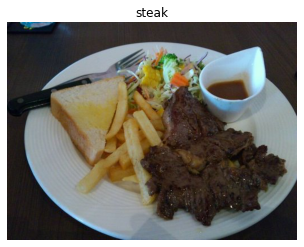

In [ ]:
#View random image from the training dataset 
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['131561.jpg']
Image shape: (512, 384, 3)


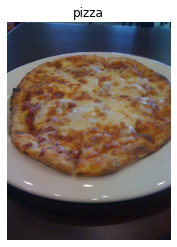

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
#Viewing the image as a tensor 
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 75,  82, 110],
        [ 75,  81, 107],
        [ 72,  78, 104],
        ...,
        [ 23,  65,  79],
        [  0,  34,  48],
        [  4,  36,  51]],

       [[ 70,  76, 102],
        [ 72,  76, 103],
        [ 70,  74,  99],
        ...,
        [ 24,  63,  78],
        [  0,  33,  50],
        [  7,  36,  52]],

       [[ 69,  71,  96],
        [ 73,  73,  99],
        [ 73,  73,  97],
        ...,
        [ 23,  60,  79],
        [  5,  33,  54],
        [ 10,  35,  55]],

       ...,

       [[ 27,  26,  21],
        [ 25,  24,  20],
        [ 24,  23,  19],
        ...,
        [ 15,  14,  22],
        [ 15,  14,  22],
        [ 14,  13,  21]],

       [[ 26,  25,  20],
        [ 26,  25,  20],
        [ 26,  25,  20],
        ...,
        [ 16,  15,  21],
        [ 16,  15,  21],
        [ 16,  15,  21]],

       [[ 26,  26,  18],
        [ 28,  28,  20],
        [ 29,  28,  23],
        ...,
        [ 18,  17,  2

In [ ]:
#View the image shape 
img.shape #return width,height and color channels

(512, 384, 3)

In [ ]:
#Normalize the data 
img = img/255.0
img

array([[[0.29411765, 0.32156863, 0.43137255],
        [0.29411765, 0.31764706, 0.41960784],
        [0.28235294, 0.30588235, 0.40784314],
        ...,
        [0.09019608, 0.25490196, 0.30980392],
        [0.        , 0.13333333, 0.18823529],
        [0.01568627, 0.14117647, 0.2       ]],

       [[0.2745098 , 0.29803922, 0.4       ],
        [0.28235294, 0.29803922, 0.40392157],
        [0.2745098 , 0.29019608, 0.38823529],
        ...,
        [0.09411765, 0.24705882, 0.30588235],
        [0.        , 0.12941176, 0.19607843],
        [0.02745098, 0.14117647, 0.20392157]],

       [[0.27058824, 0.27843137, 0.37647059],
        [0.28627451, 0.28627451, 0.38823529],
        [0.28627451, 0.28627451, 0.38039216],
        ...,
        [0.09019608, 0.23529412, 0.30980392],
        [0.01960784, 0.12941176, 0.21176471],
        [0.03921569, 0.1372549 , 0.21568627]],

       ...,

       [[0.10588235, 0.10196078, 0.08235294],
        [0.09803922, 0.09411765, 0.07843137],
        [0.09411765, 0

#An end-to-end example 
Building a convolutional neural network to find patterns in our images. 
* Load images 
* Preprocess our images 
* Build a CNN to find patterns in our image
* Compile our CNN
* Fit the CNN to our training data 

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data (Get all the pixel value between 0 and 1)
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

#Build the CNN model!!!
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")# 3 is for the color channels 
])


#Compile the CNN model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model 
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 23s 231ms/step - loss: 0.6097 - accuracy: 0.6507 - val_loss: 0.4548 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 10s 218ms/step - loss: 0.4865 - accuracy: 0.7747 - val_loss: 0.4018 - val_accuracy: 0.8460
Epoch 3/10
35/47 [=====================>........] - ETA: 1s - loss: 0.4520 - accuracy: 0.7991

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
#Using the same model in the classification with the images dataset 


#Tweaked the model a little because the accuracy was 50% 
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

model_2.fit(train_data,
            epochs=10,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 12s 227ms/step - loss: 2.7122 - accuracy: 0.5767 - val_loss: 0.6232 - val_accuracy: 0.7420
Epoch 2/10
47/47 [==============================] - 10s 209ms/step - loss: 0.5472 - accuracy: 0.7347 - val_loss: 0.5580 - val_accuracy: 0.7240
Epoch 3/10
47/47 [==============================] - 10s 208ms/step - loss: 0.6192 - accuracy: 0.7140 - val_loss: 0.7310 - val_accuracy: 0.6640
Epoch 4/10
47/47 [==============================] - 9s 198ms/step - loss: 0.5154 - accuracy: 0.7660 - val_loss: 0.4581 - val_accuracy: 0.7840
Epoch 5/10
47/47 [==============================] - 9s 188ms/step - loss: 0.6291 - accuracy: 0.7453 - val_loss: 0.4636 - val_accuracy: 0.7960
Epoch 6/10
47/47 [==============================] - 10s 209ms/step - loss: 0.5276 - accuracy: 0.7620 - val_loss: 0.6212 - val_accuracy: 0.7380
Epoch 7/10
47/47 [==============================] - 10s 207ms/step - loss: 0.5861 - accuracy: 0.7407 - val_loss: 0.5585 - val_accuracy: 0.7780
E

In [ ]:
model_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


#Lets break down the binary classification 
1. Become one with data (Visualize it)
2. Preprocess the data (normalize and turn the data into batches)
3. Create a model 
4. Fit the model
5. Evaluate the model 
6. Adjust different parameters and improve the model
7. Repeat until satsfied 

['3059843.jpg']
Image shape: (512, 512, 3)
['2587918.jpg']
Image shape: (512, 512, 3)


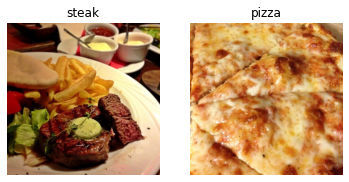

In [ ]:
#1. Become one with the data 
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
#2. Preprocess the data 
#Lets define the directory dataset paths 

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/train/"

#Turn the data into batches 
#A batch is a small subset of the data. Rather than looking at all the data at one time, a model might only look at 32 at a time
#It does this because: 
#1. All the data might not fit into the memory of the GPU
#2. Trying to learn the patterns in all the data in one hit, could result in the model not being able to learn well.


#Lets train and test data generators and rescale the data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Lets load the image data from directories and turn them into batches 

train_data = train_datagen.flow_from_directory(directory = train_dir, # The directory you want the images to be loaded
                                               target_size = (224,224), # Defaults to 256,256
                                               class_mode = "binary") # Type of data (Optimizers!!)) # Put them into batches of 32

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             batch_size = (224,224),
                                             class_mode = "binary")


#Get a sample of the train data batch 
images, labels = train_data.next()
len(images), len(labels)



Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


(32, 32)

In [ ]:

#How many batches are there 
len(train_data)

47

In [ ]:
#Get the first two images of the first batch 
images[2], images[0].shape

(array([[[0.00784314, 0.        , 0.01176471],
         [0.00784314, 0.        , 0.01176471],
         [0.01960784, 0.        , 0.01568628],
         ...,
         [0.15294118, 0.09019608, 0.09411766],
         [0.14117648, 0.08235294, 0.10196079],
         [0.09803922, 0.04705883, 0.07450981]],
 
        [[0.00784314, 0.        , 0.01176471],
         [0.00784314, 0.        , 0.01176471],
         [0.01960784, 0.        , 0.01568628],
         ...,
         [0.14509805, 0.08627451, 0.09803922],
         [0.11764707, 0.07058824, 0.08627451],
         [0.07450981, 0.03137255, 0.05490196]],
 
        [[0.01176471, 0.00392157, 0.01568628],
         [0.00784314, 0.        , 0.01176471],
         [0.01176471, 0.00392157, 0.01568628],
         ...,
         [0.14117648, 0.08235294, 0.09411766],
         [0.10588236, 0.05490196, 0.08235294],
         [0.06666667, 0.02352941, 0.05490196]],
 
        ...,
 
        [[0.01176471, 0.        , 0.03529412],
         [0.01176471, 0.        , 0.03529

In [ ]:
#Create a CNN model (start with a baseline)

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=(3,3), 
         strides=(1,1),
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
     
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# history_4 = model_4.fit(train_data,
#                         epochs=5

SyntaxError: ignored

In [ ]:
#Evaluating the model by plotting it!!
import pandas as pd 
pd.DataFrame(history_4.history).plot(figsize=(10,7))

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

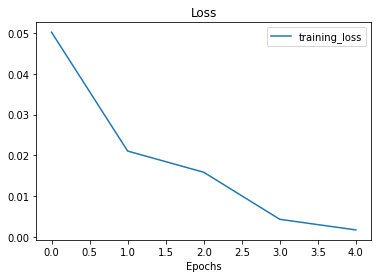

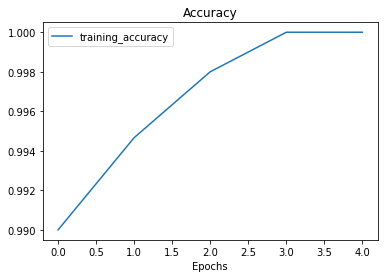

In [ ]:
plot_loss_curves(history_4)

When a models validdation loss starts to increase, it's likely that the model is overfitting the training data set

Ways to induce overfitting: 
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Ways to reduce overfitting: 
* Add data augmentation
* Add regularization
* Add more data 

In [ ]:
#Create the model( this is the new baseline )
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf


tf.random.set_seed(42)

#Preprocess data (Get all the pixel value between 0 and 1)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
model_5 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))
# test_data.shape

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4508 - accuracy: 0.8060 - val_loss: 0.3641 - val_accuracy: 0.8620
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4087 - accuracy: 0.8280 - val_loss: 0.3501 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3913 - accuracy: 0.8347 - val_loss: 0.3753 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3523 - accuracy: 0.8447 - val_loss: 0.3201 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3488 - accuracy: 0.8560 - val_loss: 0.4433 - val_accuracy: 0.7760


In [ ]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, None, None, 10)  

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range =0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)


train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)



In [ ]:
#Import data and augment it from traiing directory
print("Augmented training data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            shuffle = False)

print("Non-augmented training data ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               shuffle = False)


print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data 
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 1500 images belonging to 2 classes.


Data augmentation is usually performed on the trainig data.
Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded in the model.

In [ ]:
#Visualizing some augmented data 
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

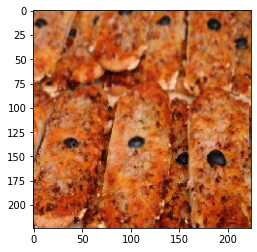

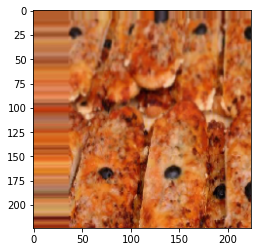

In [ ]:
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])

plt.figure()
plt.imshow(augmented_images[random_number])

In [ ]:
#Create model that is trained on augmented training data!!
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 584ms/step - loss: 0.8306 - accuracy: 0.4167 - val_loss: 0.6846 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 32s 664ms/step - loss: 0.6950 - accuracy: 0.5040 - val_loss: 0.6874 - val_accuracy: 0.5393
Epoch 3/5
47/47 [==============================] - 29s 612ms/step - loss: 0.6932 - accuracy: 0.5220 - val_loss: 0.6793 - val_accuracy: 0.5380
Epoch 4/5
47/47 [==============================] - 28s 597ms/step - loss: 0.6919 - accuracy: 0.6007 - val_loss: 0.6859 - val_accuracy: 0.6853
Epoch 5/5
47/47 [==============================] - 29s 611ms/step - loss: 0.6884 - accuracy: 0.5513 - val_loss: 0.6753 - val_accuracy: 0.6360


In [ ]:
print("Augmented data with shuffle")
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size = (224,224),
                                                                           class_mode = "binary")

Augmented data with shuffle
Found 1500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model_7 = Sequential([
    Conv2D(10,3,activation="relu", input_shape =(224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
model_7.fit(train_data_augmented_shuffle,
            epochs = 5)

Epoch 1/5
47/47 [==============================] - 32s 463ms/step - loss: 0.6612 - accuracy: 0.6047
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5854 - accuracy: 0.7033
Epoch 3/5
47/47 [==============================] - 21s 438ms/step - loss: 0.5350 - accuracy: 0.7493
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5330 - accuracy: 0.7467
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5039 - accuracy: 0.7547


In [ ]:
print(class_names)

['pizza' 'steak']


--2023-03-09 13:16:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.4’

03-steak.jpeg.4     100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-03-09 13:16:05 (242 MB/s) - ‘03-steak.jpeg.4’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

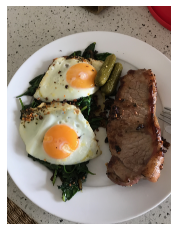

In [ ]:
#View our example image 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak 

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
#Create a function to import the image and resize it to be used with the model 
def load_and_prep_image(filename,img_shape = 224):

  #Read the image 
  img = tf.io.read_file(filename)

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img,size = [img_shape,img_shape])

  #Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
#Load in and preprocess our custom image 
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak,axis = 0)
pred = model_7.predict(expanded_steak)

1/1 [==============================] - 0s 45ms/step


In [ ]:
#Lets transform the prediction probability shown in the above result (0.9535...) to the class_names
#We can index the predicted class by rounding the prediction probablity 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names = class_names):
  #Import the target image and preprocess it 
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and the predicted class 
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 22ms/step


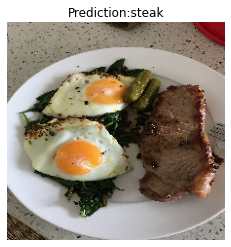

In [ ]:
pred_and_plot(model_7,"03-steak.jpeg")

--2023-03-09 13:43:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.5’

03-pizza-dad.jpeg.5 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-03-09 13:43:58 (187 MB/s) - ‘03-pizza-dad.jpeg.5’ saved [2874848/2874848]

1/1 [==============================] - 0s 35ms/step


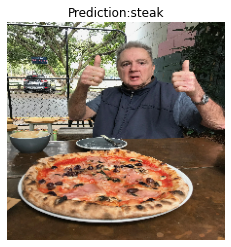

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,"03-pizza-dad.jpeg")

#Wrong prediction!!!

In [ ]:
steak = load_and_prep_image("03-pizza-dad.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2887255 , 0.3009804 , 0.2632353 ],
        [0.44705883, 0.47843137, 0.39607844],
        [0.57598037, 0.5955882 , 0.5093137 ],
        ...,
        [0.05686275, 0.06862745, 0.04117647],
        [0.05588235, 0.0754902 , 0.04803922],
        [0.07745098, 0.08921569, 0.06176471]],

       [[0.9377451 , 0.9553922 , 0.9651961 ],
        [0.8838235 , 0.9102941 , 0.92107844],
        [0.9411765 , 0.9607843 , 0.9588235 ],
        ...,
        [0.04313726, 0.05490196, 0.02745098],
        [0.07843138, 0.09019608, 0.0627451 ],
        [0.08186275, 0.10147059, 0.07401961]],

       [[0.12745099, 0.13529412, 0.12352941],
        [0.175     , 0.17450981, 0.16617647],
        [0.12941177, 0.14901961, 0.13333334],
        ...,
        [0.03431373, 0.05196078, 0.0245098 ],
        [0.05833333, 0.07009804, 0.04264706],
        [0.05343137, 0.08088236, 0.0495098 ]],

       ...,

       [[0.24264705, 0.16029412, 0.07794118],
        [0.23

In [ ]:


expanded_steak = tf.expand_dims(steak,axis = 0)
pred = model_7.predict(expanded_steak)
pred

1/1 [==============================] - 0s 20ms/step


array([[0.6169655]], dtype=float32)

Multi-class Image Classification:

Lets create a model that learns from 10 classes
1. Become one with the data
2. Preprocess the data 
3. Create a model
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

> Indented block



In [ ]:
#Import zipfile 
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#Unzip our data 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-03-11 02:39:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2023-03-11 02:39:41 (22.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 1

In [ ]:
#Setup the train adn test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"



In [ ]:
#Lets get the class names 
import pathlib 
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Visualize 
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#Rescale 
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 

model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")

])


model_8.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


history_8 = model_8.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 64s 220ms/step - loss: 2.0985 - accuracy: 0.2465 - val_loss: 1.9756 - val_accuracy: 0.2888
Epoch 2/5
235/235 [==============================] - 49s 207ms/step - loss: 1.8989 - accuracy: 0.3391 - val_loss: 1.8359 - val_accuracy: 0.3584
Epoch 3/5
235/235 [==============================] - 57s 245ms/step - loss: 1.7542 - accuracy: 0.3959 - val_loss: 1.7857 - val_accuracy: 0.3684
Epoch 4/5
235/235 [==============================] - 49s 209ms/step - loss: 1.5928 - accuracy: 0.4689 - val_loss: 1.8098 - val_accuracy: 0.3660
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 1.3974 - accuracy: 0.5287 - val_loss: 1.8943 - val_accuracy: 0.3584


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 2.1047 - accuracy: 0.3176


[2.1046764850616455, 0.3176000118255615]

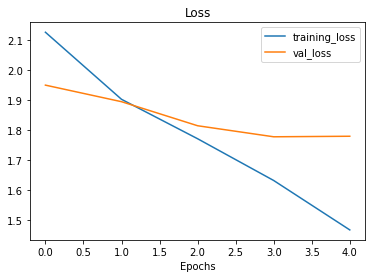

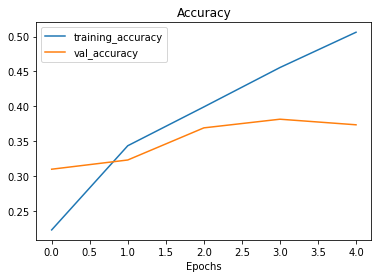

In [ ]:
#Lets check out the model's loss curves 
plot_loss_curves(history_8)

In [ ]:
#This model shows its overfitting. Let's fix it!!
# 1. Get More data 
# 2. Simplify the model 
# 3. Use data augmentation
# 4. Use transfer learning 

In [ ]:
#lets simplify the model 
model_8.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 10)       

In [ ]:
#Lets remove 2 convulational layers 
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 206ms/step - loss: 2.1020 - accuracy: 0.2459 - val_loss: 1.9200 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 48s 204ms/step - loss: 1.7317 - accuracy: 0.4116 - val_loss: 1.8428 - val_accuracy: 0.3616
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 1.3427 - accuracy: 0.5693 - val_loss: 1.9497 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 0.9037 - accuracy: 0.7215 - val_loss: 2.2226 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 48s 203ms/step - loss: 0.5276 - accuracy: 0.8504 - val_loss: 2.5913 - val_accuracy: 0.2984


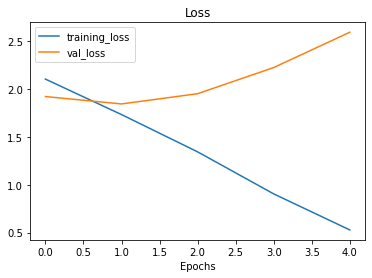

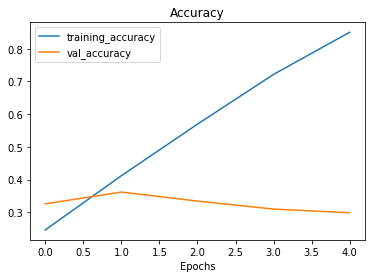

In [ ]:
plot_loss_curves(history_9)
#No difference in the loss curves!!!!

In [ ]:
#Let's try data augmentation!!

In [ ]:
#create an augmented data generator instance 
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)
 
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = "categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
#Lets create another model and lets fit it with the agmented data 
model_10 = tf.keras.models.clone_model(model_8)

In [ ]:
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])


history_10 = model_10.fit(train_data_augmented,
             epochs = 20,
             steps_per_epoch = len(train_data_augmented),
             validation_data = test_data,
             validation_steps = len(test_data))

Epoch 1/20
235/235 [==============================] - 123s 505ms/step - loss: 2.1998 - accuracy: 0.1959 - val_loss: 2.0498 - val_accuracy: 0.2640
Epoch 2/20
235/235 [==============================] - 117s 500ms/step - loss: 2.0626 - accuracy: 0.2663 - val_loss: 1.9218 - val_accuracy: 0.3116
Epoch 3/20
235/235 [==============================] - 117s 498ms/step - loss: 1.9998 - accuracy: 0.2949 - val_loss: 1.8545 - val_accuracy: 0.3524
Epoch 4/20
235/235 [==============================] - 117s 499ms/step - loss: 1.9663 - accuracy: 0.3177 - val_loss: 1.8454 - val_accuracy: 0.3504
Epoch 5/20
235/235 [==============================] - 117s 498ms/step - loss: 1.9443 - accuracy: 0.3248 - val_loss: 1.8145 - val_accuracy: 0.3776
Epoch 6/20
235/235 [==============================] - 117s 496ms/step - loss: 1.9212 - accuracy: 0.3389 - val_loss: 1.7594 - val_accuracy: 0.4040
Epoch 7/20
235/235 [==============================] - 116s 494ms/step - loss: 1.8990 - accuracy: 0.3456 - val_loss: 1.7582 -

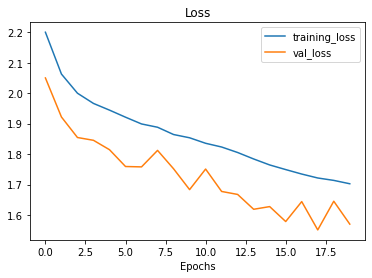

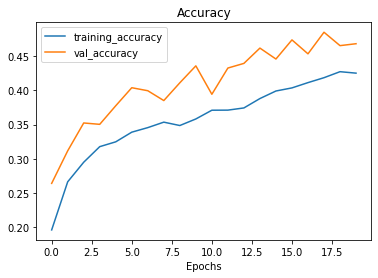

In [ ]:
plot_loss_curves(history_10)

In [ ]:
#Lets make predictions on custom images!!
#Lets download some custom images!!


!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-03-11 03:30:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-03-11 03:30:11 (233 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-03-11 03:30:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
#Reconfig pred and plot function to work with multi class images 
def pred_and_plot(model,filename,class_names = class_names):
  #Import the target image and preprocess it 
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Logic for multiclass 
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
  
  #Plot the image and the predicted class 
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 22ms/step


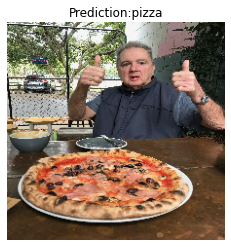

In [ ]:
pred_and_plot(model = model_10, 
              filename = "03-pizza-dad.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 19ms/step


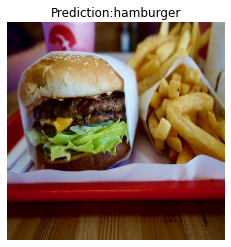

In [ ]:
pred_and_plot(model = model_10, 
              filename = "03-hamburger.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 32ms/step


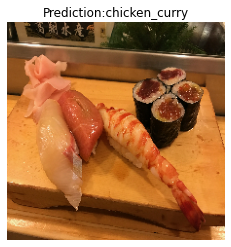

In [ ]:
pred_and_plot(model = model_10, 
              filename = "03-sushi.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 19ms/step


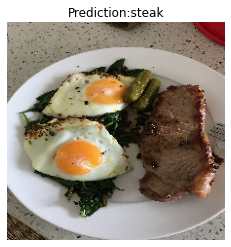

In [ ]:
pred_and_plot(model = model_10, 
              filename = "03-steak.jpeg",
              class_names = class_names)

In [ ]:
#Saving and loading the model!!

#Save a model 
model_10.save("Saved_Trained_Model_10")

In [ ]:
#Load in the trained model
loaded_model = tf.keras.models.load_model("Saved_Trained_Model_10")
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 1.5704 - accuracy: 0.4684


[1.5704413652420044, 0.4684000015258789]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 1.5704 - accuracy: 0.4684


[1.5704412460327148, 0.4684000015258789]